In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

## Supervised learning
Modellizzare la relazione tra alcuni campi dei dati (features) e il valore di una etichetta (label) associata ai dati.

#### Classification: Predicting discrete data

Given a set of labeled points, use these to classify some unlabeled points.

### Esempio: K-NeighborsClassifier

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

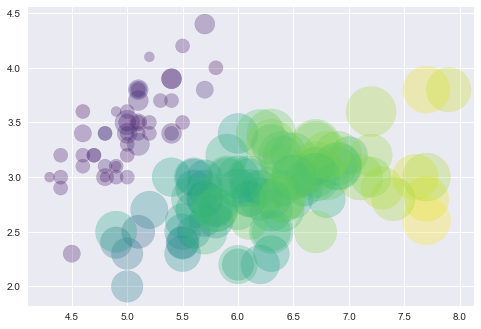

In [16]:
plt.scatter(X[:,0], X[:,1], c=X[:,2], s=(X[:,3]*1000),cmap='viridis', alpha=0.3)

In [18]:
# to be continued...

#### Regression: Predicting continuous labels
Labels now are continous quantities.

### Esempio: Regressione lineare

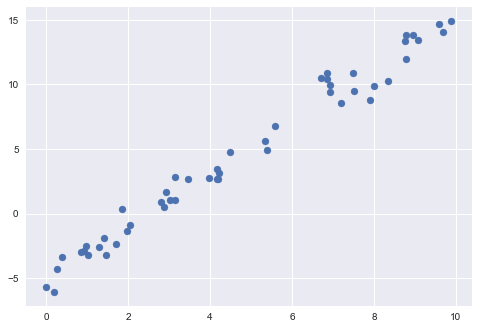

In [44]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50) # 50 elementi [0,10]
y = 2 * x - 5 + rng.randn(50) # retta y=2x-5 + rumore sui 50 punti
plt.scatter(x, y)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression(fit_intercept=True) # retta non passa per origine
model.fit(x[:, np.newaxis], y) # X deve essere bidimensionale

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
xfit = np.linspace(0,10,1000) # nuovo dataset
yfit = model.predict(xfit[:, np.newaxis])

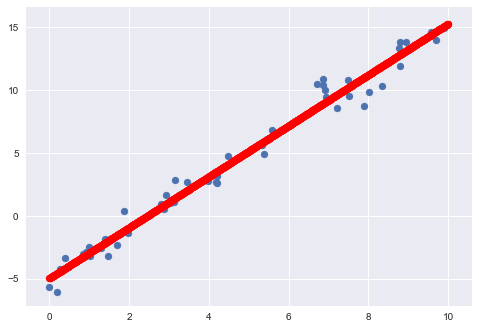

In [48]:
plt.scatter(x, y)
plt.scatter(xfit, yfit, color='red')

In [49]:
# originale: y = 2x - 5 + rumore
print("slope: ", model.coef_[0]) # pendenza retta (vicino a 2)
print("intercept: ", model.intercept_) # intercetta retta (vicino a -5)

slope:  2.0272088103606953
intercept:  -4.998577085553204


### Esempio: Regressione non lineare

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50) # sin(x) + rumore

In [52]:
x=x[:, np.newaxis]
x.shape

(50, 1)

In [53]:
poly_obj = PolynomialFeatures(degree=5) # polinomio di grado 5

In [54]:
# applica trasformazione a features iniziali
x_poly = poly_obj.fit_transform(x)

In [55]:
x_poly.shape

(50, 6)

In [56]:
# modello regressione lineare
model = LinearRegression()

In [57]:
# addestramento modello su features di dim 6
model.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
xfit = np.linspace(0,10,100)
# previsione dati su nuovi dati ma prima bisogna trasformarli
yfit = model.predict(poly_obj.fit_transform(xfit[:, np.newaxis]))

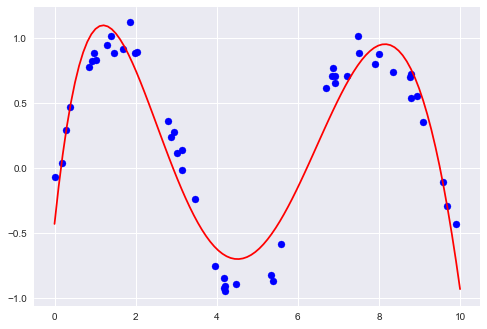

In [59]:
plt.scatter(x,y,c='b')
plt.plot(xfit, yfit, 'r')

## Unsupervised learning
Creare modelli dei dati sulla base di features ma senza etichette.

#### Clustering: Inferring labels on unlabeled data (K-means)
Data is automatically assigned to some number of discrete groups.

#### Dimensionality reduction: Inferring structure of unlabeled data
Labels or other information are inferred from the structure of the dataset itself.
Cerca di tirare fuori una rappresentazione basso-dimensionale dei dati che in qualche modo preserva le qualità rilevanti in differenti modi. (preserva la qualità dei dati anche se riduce le dimensioni (numero di features))